In [11]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler


数据来源：   （展开缩小动画很有意思）
https://www.met.ie/climate/available-data/historical-data

In [10]:
!pip install statsmodels

     |████████████████████████████████| 8.7MB 25kB/s eta 0:00:018
     |████████████████████████████████| 235kB 26kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
mydata=pd.read_csv("mly833.csv")
mydata

,year,month,rain
0,1959,11,193.0
1,1959,12,295.4
2,1960,1,127.9
3,1960,2,106.1
4,1960,3,53.9
...,...,...,...
717,2019,8,221.9
718,2019,9,166.3
719,2019,10,152.0
720,2019,11,142.5


In [13]:
tseries=mydata['rain']
tseries

0      193.0
1      295.4
2      127.9
3      106.1
4       53.9
       ...  
717    221.9
718    166.3
719    152.0
720    142.5
721    217.3
Name: rain, Length: 722, dtype: float64

In [14]:
type(tseries)

pandas.core.series.Series

In [15]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.927739
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


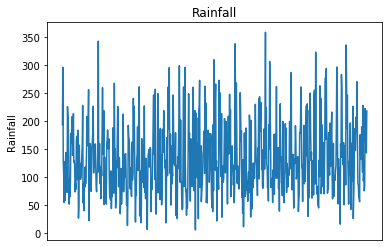

In [17]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Rainfall')
plt.title("Rainfall")
plt.show()

In [18]:
df=pd.DataFrame(tseries)
df

,rain
0,193.0
1,295.4
2,127.9
3,106.1
4,53.9
...,...
717,221.9
718,166.3
719,152.0
720,142.5


In [19]:
df = df[:712]
df

,rain
0,193.0
1,295.4
2,127.9
3,106.1
4,53.9
...,...
707,131.2
708,150.6
709,189.1
710,139.1


In [21]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [22]:

# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.53242707],
       [0.82242991],
       [0.34806004],
       [0.28632116],
       [0.13848768],
       [0.34494477],
       [0.14811668],
       [0.33050127],
       [0.39139054],
       [0.31067686],
       [0.31634098],
       [0.19003115],
       [0.62390258],
       [0.5865194 ],
       [0.54007363],
       [0.36731804],
       [0.13055792],
       [0.25828377],
       [0.16737468],
       [0.24468989],
       [0.48937978],
       [0.44038516],
       [0.4709714 ],
       [0.57320872],
       [0.37751345],
       [0.39025772],
       [0.58850184],
       [0.34211272],
       [0.35032569],
       [0.3268196 ],
       [0.1922968 ],
       [0.23760974],
       [0.20504106],
       [0.44916454],
       [0.47352025],
       [0.25403568],
       [0.42367601],
       [0.50438969],
       [0.05947324],
       [0.11894647],
       [0.42877372],
       [0.26649674],
       [0.3367318 ],
       [0.25630133],
       [0.27131124],
       [0.32427074],
       [0.36731804],
       [0.429

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 120
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)


In [24]:
X_train

array([[0.53242707, 0.82242991, 0.34806004, ..., 0.21042198, 0.16765789,
        0.28518833],
       [0.82242991, 0.34806004, 0.28632116, ..., 0.16765789, 0.28518833,
        0.51713396],
       [0.34806004, 0.28632116, 0.13848768, ..., 0.28518833, 0.51713396,
        0.49079581],
       ...,
       [0.25035401, 0.06513735, 0.55451713, ..., 0.49221184, 0.48994619,
        0.53044463],
       [0.06513735, 0.55451713, 0.23789295, ..., 0.48994619, 0.53044463,
        0.72302464],
       [0.55451713, 0.23789295, 0.10676862, ..., 0.53044463, 0.72302464,
        0.56046446]])

In [25]:
Y_train

array([0.51713396, 0.49079581, 0.18606627, 0.74199943, 0.38770886,
       0.41121495, 0.1107335 , 0.14811668, 0.34862645, 0.31464174,
       0.48314925, 0.62475219, 0.55168508, 0.21835174, 0.35542339,
       0.36618522, 0.24072501, 0.0815633 , 0.15463042, 0.31067686,
       0.13084112, 0.20419145, 0.23024639, 0.30331351, 0.58595299,
       0.19314642, 0.29651657, 0.2645143 , 0.38176154, 0.3845936 ,
       0.38572642, 0.24752195, 0.12687624, 0.18210139, 0.02237327,
       0.15491362, 0.52931181, 0.46587369, 0.46304163, 0.41036534,
       0.21750212, 0.20589068, 0.31407533, 0.17558765, 0.16907392,
       0.44463325, 0.25290286, 0.29085245, 0.66581705, 0.40611725,
       0.62588502, 0.3990371 , 0.23845936, 0.03993203, 0.19088077,
       0.17417162, 0.35287454, 0.38572642, 0.52081563, 0.30048145,
       0.51600113, 0.55848202, 0.72387426, 0.07080147, 0.1874823 ,
       0.29679977, 0.03625035, 0.12064571, 0.4613424 , 0.24129142,
       0.33050127, 0.40073634, 0.42764089, 0.21495327, 0.62730

Train on 358 samples, validate on 90 samples
Epoch 1/100
358/358 - 2s - loss: 0.0837 - val_loss: 0.0735
Epoch 2/100
358/358 - 0s - loss: 0.0725 - val_loss: 0.0627
Epoch 3/100
358/358 - 0s - loss: 0.0627 - val_loss: 0.0534
Epoch 4/100
358/358 - 0s - loss: 0.0544 - val_loss: 0.0458
Epoch 5/100
358/358 - 0s - loss: 0.0477 - val_loss: 0.0400
Epoch 6/100
358/358 - 0s - loss: 0.0428 - val_loss: 0.0361
Epoch 7/100
358/358 - 0s - loss: 0.0396 - val_loss: 0.0340
Epoch 8/100
358/358 - 0s - loss: 0.0380 - val_loss: 0.0333
Epoch 9/100
358/358 - 0s - loss: 0.0378 - val_loss: 0.0336
Epoch 10/100
358/358 - 0s - loss: 0.0384 - val_loss: 0.0344
Epoch 11/100
358/358 - 0s - loss: 0.0394 - val_loss: 0.0352
Epoch 12/100
358/358 - 0s - loss: 0.0403 - val_loss: 0.0357
Epoch 13/100
358/358 - 0s - loss: 0.0408 - val_loss: 0.0359
Epoch 14/100
358/358 - 0s - loss: 0.0410 - val_loss: 0.0356
Epoch 15/100
358/358 - 0s - loss: 0.0406 - val_loss: 0.0351
Epoch 16/100
358/358 - 0s - loss: 0.0400 - val_loss: 0.0343
Epoc

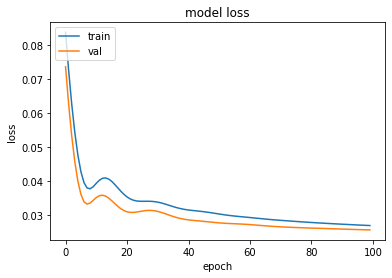

In [26]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=712, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 2000      
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 2,005
Trainable params: 2,005
Non-trainable params: 0
_________________________________________________________________


In [28]:
tf.keras.utils.plot_model(model,'lstm_ts.png',show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [29]:

# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [30]:
trainpred

array([[0.44124007],
       [0.39432296],
       [0.3592488 ],
       [0.33906636],
       [0.27697885],
       [0.28696084],
       [0.3494023 ],
       [0.2762898 ],
       [0.31503305],
       [0.31046593],
       [0.34376916],
       [0.44721866],
       [0.46019995],
       [0.3897883 ],
       [0.4159685 ],
       [0.32873663],
       [0.27131957],
       [0.28300402],
       [0.28605825],
       [0.34114745],
       [0.33011523],
       [0.2738126 ],
       [0.42662895],
       [0.35672313],
       [0.43442   ],
       [0.41927254],
       [0.400888  ],
       [0.36898407],
       [0.2741923 ],
       [0.27752155],
       [0.2974742 ],
       [0.2926742 ],
       [0.32177818],
       [0.32935566],
       [0.37783358],
       [0.4044707 ],
       [0.49451116],
       [0.4385486 ],
       [0.35514936],
       [0.38920996],
       [0.3394377 ],
       [0.32017073],
       [0.2770155 ],
       [0.278153  ],
       [0.32651785],
       [0.2857903 ],
       [0.33083907],
       [0.431

In [31]:

# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [32]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 57.69 RMSE
Validation Score: 50.71 RMSE


In [33]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [34]:

# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

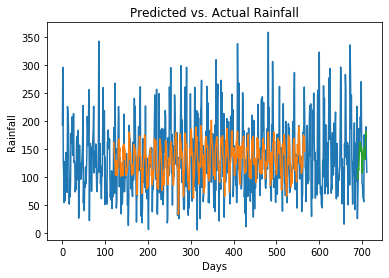

In [35]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.title("Predicted vs. Actual Rainfall")
plt.show()

In [36]:

Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [37]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)
predictions


0      97.574448
1      95.803673
2     115.825966
3     111.630302
4     131.049942
5     149.274597
6     159.061386
7     161.431061
8     145.600571
9     153.711349
10    143.550797
11    106.268517
12    110.749611
13    143.999619
14    134.553055
15    151.220322
16    137.854492
17    147.831635
18    130.966553
19    162.657455
20    181.407196
21    172.894714
dtype: float32

In [38]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [39]:
mda(Y_val, predictions)


0.9090909090909091

In [40]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 50.711276


In [41]:
forecast_error = (predictions-Y_val)
forecast_error

0      72.274448
1      32.803673
2      17.025966
3     -70.569698
4     -55.150058
5       2.474597
6     -18.138614
7     -45.568939
8     -35.699429
9    -115.988651
10    -11.449203
11     18.968517
12     24.549611
13     80.299619
14     73.153055
15     95.820322
16    -37.045508
17      5.631635
18     -0.233447
19     12.057455
20     -7.692804
21     33.794714
dtype: float64

In [42]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

3.2416936007412995

In [43]:
X_train

array([[[0.53242707, 0.82242991, 0.34806004, ..., 0.21042198,
         0.16765789, 0.28518833]],

       [[0.82242991, 0.34806004, 0.28632116, ..., 0.16765789,
         0.28518833, 0.51713396]],

       [[0.34806004, 0.28632116, 0.13848768, ..., 0.28518833,
         0.51713396, 0.49079581]],

       ...,

       [[0.25035401, 0.06513735, 0.55451713, ..., 0.49221184,
         0.48994619, 0.53044463]],

       [[0.06513735, 0.55451713, 0.23789295, ..., 0.48994619,
         0.53044463, 0.72302464]],

       [[0.55451713, 0.23789295, 0.10676862, ..., 0.53044463,
         0.72302464, 0.56046446]]])

In [44]:
# Test (unseen) predictions
Xnew = np.array([tseries.iloc[592:712],tseries.iloc[593:713],tseries.iloc[594:714],tseries.iloc[595:715],tseries.iloc[596:716],tseries.iloc[597:717],tseries.iloc[598:718],tseries.iloc[599:719],tseries.iloc[600:720],tseries.iloc[601:721]])

In [45]:
Xnew

array([[123.1, 110.8, 128.8, ..., 189.1, 139.1, 107.9],
       [110.8, 128.8,  67.5, ..., 139.1, 107.9, 227.3],
       [128.8,  67.5, 243.8, ..., 107.9, 227.3,  92.6],
       ...,
       [132.3, 322.6, 133.8, ...,  84.1, 221.9, 166.3],
       [322.6, 133.8,  86. , ..., 221.9, 166.3, 152. ],
       [133.8,  86. ,  69.1, ..., 166.3, 152. , 142.5]])

In [46]:

Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [49]:
ynew

array([[0.3687933 ],
       [0.2696349 ],
       [0.17150551],
       [0.37317035],
       [0.43052787],
       [0.44431233],
       [0.45393553],
       [0.37798816],
       [0.6655874 ],
       [0.5756201 ]], dtype=float32)

In [50]:
ynew.shape


(10, 1)

In [51]:

actual=tseries.iloc[712:722]
actual

712    227.3
713     92.6
714    110.5
715     74.8
716     84.1
717    221.9
718    166.3
719    152.0
720    142.5
721    217.3
Name: rain, dtype: float64

In [52]:
actual = np.array(actual)
actual

array([227.3,  92.6, 110.5,  74.8,  84.1, 221.9, 166.3, 152. , 142.5,
       217.3])

In [53]:

actual=actual.reshape(10,-1)
actual.shape

(10, 1)

In [54]:
actual

array([[227.3],
       [ 92.6],
       [110.5],
       [ 74.8],
       [ 84.1],
       [221.9],
       [166.3],
       [152. ],
       [142.5],
       [217.3]])

In [47]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

3.2416936007412995

In [55]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [56]:
np.min(df)


0.0

In [57]:
ynew

array([0.3687933 , 0.2696349 , 0.17150551, 0.37317035, 0.43052787,
       0.44431233, 0.45393553, 0.37798816, 0.6655874 , 0.5756201 ],
      dtype=float32)

In [58]:
maxt=np.max(tseries)
mint=np.min(tseries)
actualpd

0    227.3
1     92.6
2    110.5
3     74.8
4     84.1
5    221.9
6    166.3
7    152.0
8    142.5
9    217.3
dtype: float64

In [60]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [61]:
ynewpd

0    135.220917
1    100.208084
2     65.558594
3    136.766449
4    157.019394
5    161.886688
6    165.284637
7    138.467621
8    240.018921
9    208.251465
dtype: float32

In [62]:
mda(actualpd, ynewpd)


0.8

In [63]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 57.524620


In [64]:
forecast_error = (ynewpd-actualpd)
forecast_error

0   -92.079083
1     7.608084
2   -44.941406
3    61.966449
4    72.919394
5   -60.013312
6    -1.015363
7   -13.532379
8    97.518921
9    -9.048535
dtype: float64

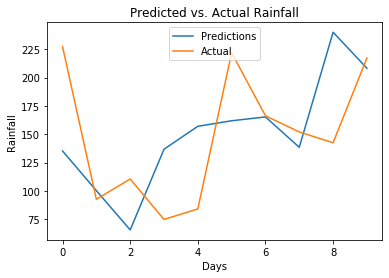

In [65]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.title("Predicted vs. Actual Rainfall")
plt.legend(loc = 'upper center')
plt.show()